# Sales Prediction 

In [ ]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
s=pd.read_csv(r"F:\Oasis\Advertising.csv")

In [3]:
s

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
un=s["Unnamed: 0"]
un

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [5]:
s=s.drop(["Unnamed: 0"],axis=1)
s

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
s.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
s.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
x=s.corr()
x

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


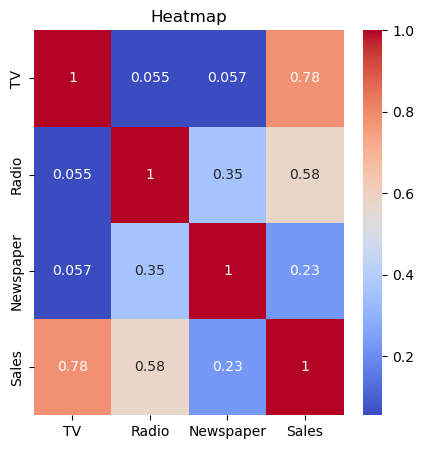

In [9]:
plt.figure(figsize=(5,5))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

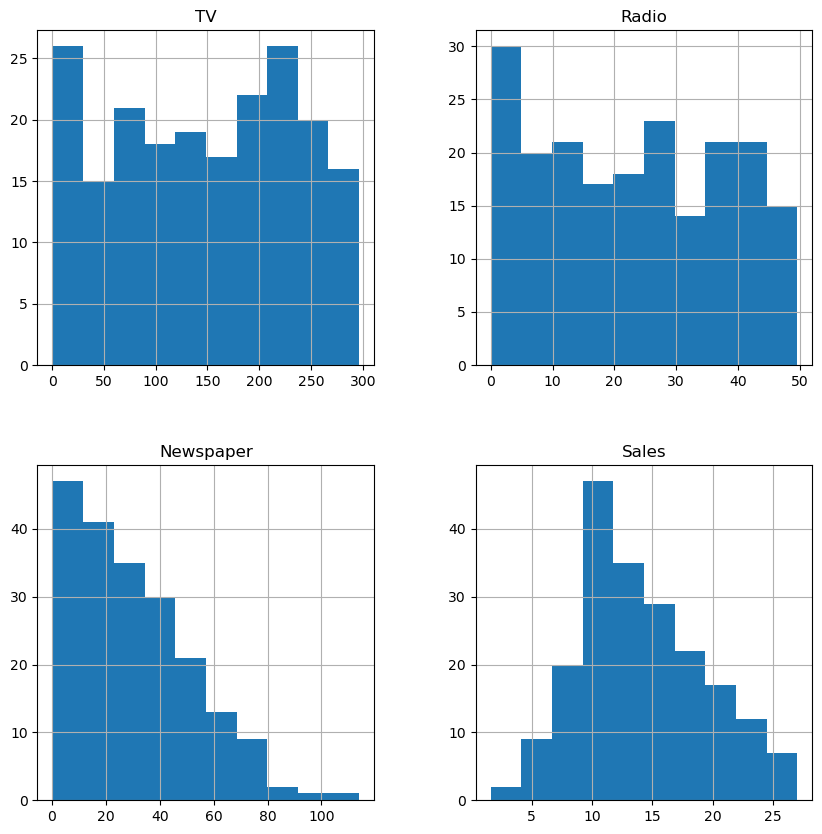

In [10]:
s.hist(figsize=(10,10))
plt.show()

# Outlier Treatment

<AxesSubplot:>

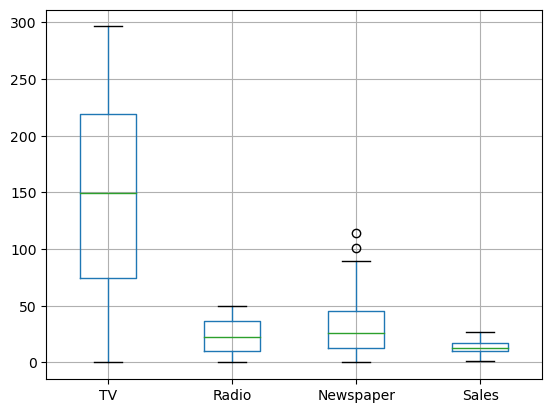

In [11]:
s.boxplot()

<AxesSubplot:ylabel='Newspaper'>

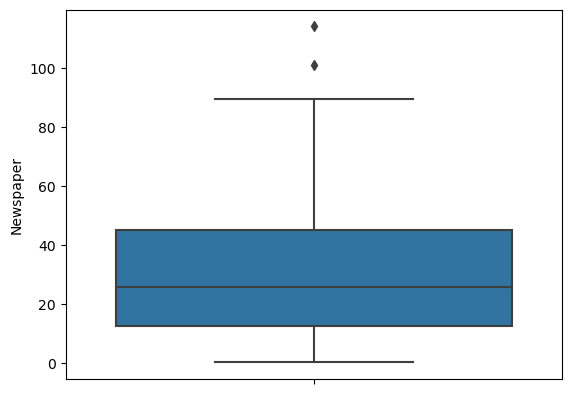

In [12]:
sns.boxplot(data=s,y="Newspaper")

In [13]:
iqr=s.Newspaper.quantile(0.75)-s.Newspaper.quantile(0.25)
iqr

32.35

In [14]:
lb=s["Newspaper"].quantile(0.25)-(iqr*3)
ub=s["Newspaper"].quantile(0.75)+(iqr*3)
print(lb,ub)

-84.30000000000001 142.15


In [15]:
s.loc[s["Newspaper"]>142.15,"Newspaper"]=142.15

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

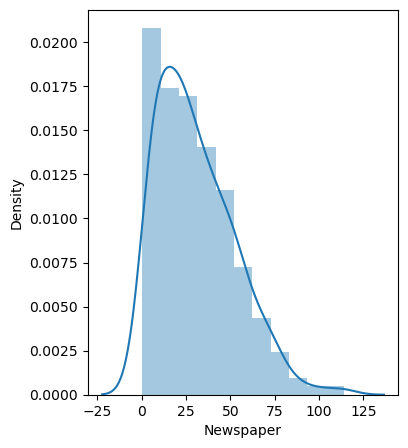

In [16]:
fig=plt.figure(figsize=(4,5))
sns.distplot(s.Newspaper)

In [17]:
s.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

# EDA

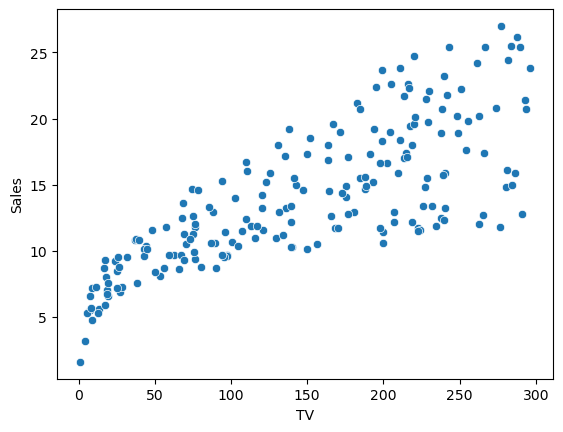

In [103]:
sns.scatterplot(x="TV",y="Sales",data=s)
plt.show()

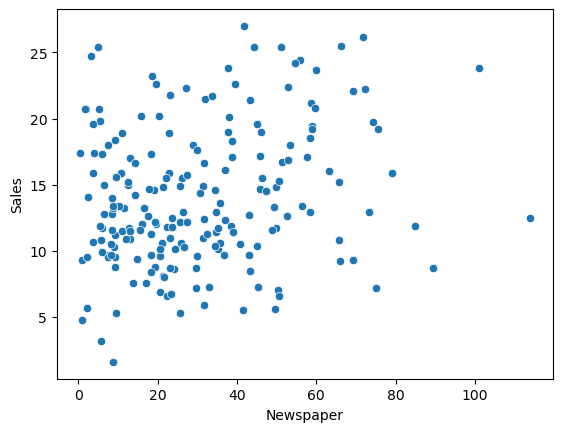

In [106]:
sns.scatterplot(x="Newspaper",y="Sales",data=s)
plt.show()

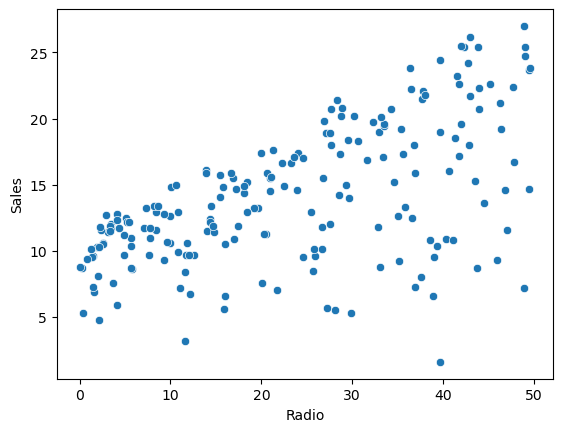

In [107]:
sns.scatterplot(x="Radio",y="Sales",data=s)
plt.show()

# MODEL

In [18]:
x=s.iloc[:,0:3]
y=s.iloc[:,-1]

In [19]:
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [21]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [22]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [23]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [24]:
lin_p=lin.predict(b_x_test)
lin_p

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

In [25]:
lin.coef_

array([0.04532832, 0.18994063, 0.00027396])

In [26]:
lin.intercept_

2.9013136928731775

In [27]:
R2=lin.score(b_x_train,b_y_train)
R2

0.8876537266968315

In [28]:
Adj_R2=1-(((1-R2)*(80-1))/(80-9-1))
Adj_R2

0.873209205843567

In [29]:
from sklearn import metrics

In [30]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

2.0634188501214745

In [31]:
#RMSE,MAPE

rmse=pow(mse,0.5)
rmse

1.4364605285636896

In [32]:
df1=pd.DataFrame({"Actual":b_y_test,"Predicted":lin_p})
df1

,Actual,Predicted
37,14.7,15.682926
109,19.8,19.589075
31,11.9,11.334422
89,16.7,16.971606
66,9.5,9.002298
119,6.6,6.825842
54,20.2,20.283708
74,17.0,17.250505
145,10.3,9.624229
142,20.1,19.212619


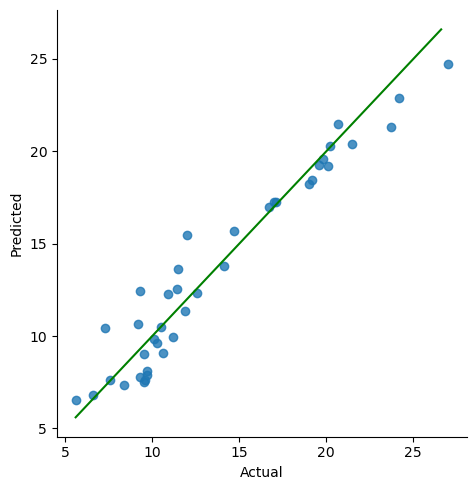

In [33]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# LASSO(L1)

In [34]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [35]:
lasso.fit(b_x_train,b_y_train)

Lasso()

In [36]:
l_p=lasso.predict(b_x_test)
l_p

array([15.5672253 , 19.56883118, 11.36258561, 16.85812992,  9.0157627 ,
        6.87417203, 20.25123437, 17.24284158,  9.72835628, 19.15828934,
       12.22031824, 13.83216727, 13.71970269, 21.18461506, 18.35401391,
        9.8352439 , 15.56999888,  7.61846827,  7.44246553, 20.33174344,
        7.64330285, 18.13805611, 24.61975107, 22.76478823,  7.87541937,
       12.64192078, 21.44487226,  7.95081455, 12.37427091, 12.31772877,
       10.61406202, 19.18224531, 10.01314462,  6.57521617, 17.22792339,
        7.7048498 ,  9.16204606,  8.19947853, 10.40049209, 10.59535278])

In [37]:
lasso.coef_

array([0.04522858, 0.18538661, 0.        ])

In [38]:
l_R2=lasso.score(b_x_train,b_y_train)
l_R2

0.8874716310902004

In [39]:
l_Adj_R2=1-(((1-l_R2)*(80-1))/(80-9-1))
l_Adj_R2

0.8730036979446548

In [40]:
l_mse=metrics.mean_squared_error(b_y_test,l_p)
l_mse

2.050581088052748

In [41]:
l_df=pd.DataFrame({"Importances":list(lasso.coef_),"column":list(b_x_test)})
l_df

,Importances,column
0,0.045229,TV
1,0.185387,Radio
2,0.000000,Newspaper


In [42]:
n_df=s.drop(["TV","Newspaper"],axis=1)
n_df

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9
...,...,...
195,3.7,7.6
196,4.9,9.7
197,9.3,12.8
198,42.0,25.5


In [43]:
n_x=n_df.iloc[:,0:1]
n_y=n_df.iloc[:,-1]

In [44]:
n_x

,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
...,...
195,3.7
196,4.9
197,9.3
198,42.0


In [45]:
nx_train,nx_test,ny_train,ny_test=train_test_split(n_x,n_y,test_size=0.2,random_state=101)

In [46]:
nx_train.shape,nx_test.shape,ny_train.shape,ny_test.shape

((160, 1), (40, 1), (160,), (40,))

In [47]:
lin.fit(nx_train,ny_train)

LinearRegression()

In [48]:
n_p=lin.predict(nx_test)
#n_p

In [49]:
n_R2=lin.score(nx_train,ny_train)
n_R2

0.3252412408126151

In [50]:
n_Adj_R2=1-(((1-n_R2)*(160-1))/(160-1-1))
n_Adj_R2

0.32097061575446706

In [51]:
n_mse=metrics.mean_squared_error(ny_test,n_p)
n_mse

19.170356725782206

In [52]:
n_df1=pd.DataFrame({"Actual_n":ny_test,"Predicted_n":n_p})
n_df1

,Actual_n,Predicted_n
37,14.7,19.354963
109,19.8,14.833063
31,11.9,12.923815
89,16.7,19.033406
66,9.5,14.370824
119,6.6,12.642453
54,20.2,15.214912
74,17.0,14.370824
145,10.3,9.808728
142,20.1,16.099195


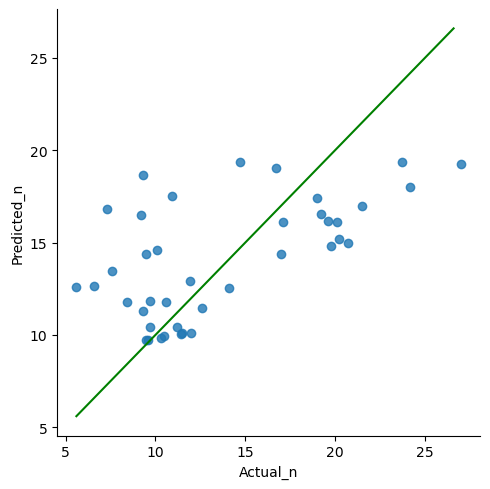

In [53]:
sns.lmplot(x="Actual_n",y="Predicted_n",data=n_df1,fit_reg=False)
d_line=np.arange(n_df1.min().min(),n_df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Ridge

In [54]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [55]:
ridge.fit(b_x_train,b_y_train)

Ridge()

In [56]:
r_p=ridge.predict(b_x_test)

In [57]:
r_df=pd.DataFrame({"Coef":list(ridge.coef_),"col":list(b_x_test)})
r_df

,Coef,col
0,0.045328,TV
1,0.189935,Radio
2,0.000275,Newspaper


In [58]:
r_R2=ridge.score(b_x_train,b_y_train)
r_R2

0.8876537264227502

In [59]:
r_AdR2=1-(((1-r_R2)*(80-1))/(80-9-1))
r_AdR2

0.8732092055342466

In [60]:
r_mse=metrics.mean_squared_error(b_y_test,r_p)
r_mse

2.063402278841603

# Elastic Net

In [61]:
import sklearn
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [64]:
from sklearn.linear_model import ElasticNet
e=ElasticNet()

In [65]:
e.fit(x_train,y_train)

ElasticNet()

In [66]:
e_p=e.predict(x_test)

In [67]:
e_rsq=e.score(x_train,y_train)
e_rsq

0.8914693916913796

In [68]:
e_adr=1-(((1-e_rsq)*(160-1))/(160-3-1))
e_adr

0.8893822646085215

In [69]:
from sklearn import metrics
e_MSE=metrics.mean_squared_error(y_test,e_p)
e_MSE

1.737838969016547

# Random forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [71]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
rfr_p=rfr.predict(x_test)

In [73]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.9965519704041901

In [74]:
rf_adr=1-(((1-rf_rsq)*(580-1))/(580-5-1))
rf_adr

0.9965219353031812

In [75]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

0.36159857500000187

# Decision Tree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [77]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
dtr_p=dtr.predict(x_test)

In [79]:
dtr_rsq=dtr.score(x_train,y_train)
dtr_rsq

1.0

In [80]:
dtr_adr=1-(((1-dtr_rsq)*(160-1))/(160-3-1))
dtr_adr

1.0

In [81]:
dtr_MSE=metrics.mean_squared_error(y_test,dtr_p)
dtr_MSE

0.8707500000000001

# SVM Regressor

In [82]:
from sklearn.svm import LinearSVR
sv=LinearSVR()

In [83]:
sv.fit(x_train,y_train)

LinearSVR()

In [84]:
sv_p=sv.predict(x_test)

In [85]:
sv_rsq=sv.score(x_train,y_train)
sv_rsq

0.7662523389590095

In [86]:
sv_adr=1-(((1-sv_rsq)*(580-1))/(580-5-1))
sv_adr

0.764216209507433

In [87]:
sv_MSE=metrics.mean_squared_error(y_test,sv_p)
sv_MSE

7.319607728062803

# KNN Regressor

In [88]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)

In [89]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [90]:
knn_p=knn.predict(x_test)

In [91]:
knn_rsq=knn.score(x_train,y_train)
knn_rsq

0.9134515509763264

In [92]:
knn_adr=1-(((1-knn_rsq)*(580-1))/(580-5-1))
knn_adr

0.9126976446259459

In [93]:
knn_MSE=metrics.mean_squared_error(y_test,knn_p)
knn_MSE

3.03289

In [94]:
list1=["ElasticNet","Random forest Regressor","Decision Tree Regressor","SVM Regressor","KNN Regressor","Linear Regression","Ridge","LASSO(L1)"]
list2=[e_rsq,rf_rsq,dtr_rsq,sv_rsq,knn_rsq,R2,r_R2,l_R2]
list3=[e_adr,rf_adr,dtr_adr,sv_adr,knn_adr,Adj_R2,r_AdR2,l_Adj_R2]
list4=[e_MSE,rfr_MSE,dtr_MSE,sv_MSE,knn_MSE,mse,r_mse,l_mse]

In [95]:
final_result=pd.DataFrame({"Model_Name":list1,"R-square":list2,"Adj_R2":list3,"MSE":list4})
final_result

,Model_Name,R-square,Adj_R2,MSE
0,ElasticNet,0.891469,0.889382,1.737839
1,Random forest Regressor,0.996552,0.996522,0.361599
2,Decision Tree Regressor,1.000000,1.000000,0.870750
3,SVM Regressor,0.766252,0.764216,7.319608
4,KNN Regressor,0.913452,0.912698,3.032890
5,Linear Regression,0.887654,0.873209,2.063419
6,Ridge,0.887654,0.873209,2.063402
7,LASSO(L1),0.887472,0.873004,2.050581
